# Decision Tree

- This is a supplement material for my lectures on ML. It sheds light on Python implementations of the supervised machine learning algorithms. 
- I assume you know Python syntax and how it works. If you don't, I highly recommend you to take a break and get introduced to the language before going forward with my code. 
- This material is represented as a Jupyter notebook, which you can easily download to reproduce the code and play around with it. 

## 1. Libraries

To build a model, we need 
- `pandas` library to work with panel dataframes
- `sklearn.model_selection.train_test_split` to split the dataset into train and test
- `sklearn.tree.DecisionTreeClassifier` to build a model

We will also need (optional)
- `sklearn.tree` to interpret a trained model
- `matplotlib.pyplot` to visualize a trained model

In [16]:
import pandas as pd
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

## 2. Data Load & Overview

Let's load the dataset and understand it.

In [17]:
# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/5x12/ml-cookbook/master/supplements/data/heart.csv')

In [53]:
# Print the first 10 rows of the dataset
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


This Public Health Dataset represents people's medical records.

- age: age in years
- sex: (1 = male; 0 = female)
- cp: chest pain type
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg: resting electrocardiographic results
- thalach: maximum heart rate achieved
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
- target: 1 or 0. It refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

The main aim is to build **a model that predicts a heart disease of a patient** (target column) based on independent variables.

## 3. Variables

Let's split the dataset into X and y, where 
- $X$ is a set of independent variables (all columns but the last one)
- $y$ is a dependent, or target variable (the last column)

In [19]:
# Filter out target column
X = df.iloc[:, :-1]

# Print X
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [20]:
# Select target column
y = df['target']

# Print y
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

## 4. Model

In this section we are going to 
- build a decision tree model, 
- evaluate its accuracy, and 
- make a prediction

We will also learn how to visualize and interpret a decision tree after training.

### 4.1. Building the model

Let's recall three simple steps:

- Split the $X$ & $y$ variables into train and test sets
- Initialize the model
- Train the model with the varialbes

In [21]:
# Split variables into train and test
X_train, X_test, y_train, y_test = train_test_split(X, #independent variables
                                                    y, #dependent variable
                                                    random_state = 3
                                                   )

In [36]:
# Initialize the model
clf = DecisionTreeClassifier(max_depth = 3,
                             random_state = 3
                            )

In [37]:
# Train the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=3)

### 4.2. Checking models accuracy

After the model has trained with the data, it's essential to understand how precisely it predicts heart disease. For that, we need to check model's accuracy. 

In [52]:
print(f'Accuracy of Decision Tree classifier on training set: {clf.score(X_train, y_train):.2f}')
print(f'Accuracy of Decision Tree classifier on test set: {clf.score(X_test, y_test):.2f}')

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.99


### 4.3. Making a prediction

Now that we know the model is accurate enough, we can predict whether or not a patient is having a heart disease by passing independent varialbes to the model. The method `predict` returns such a prediction - 0 for NO, 1 for YES.

In [39]:
clf.predict([[59, 1, 0, 101, 234, 0, 1, 143, 0, 3.4, 0, 0, 0]])

/Users/andrewwolf/.pyenv/versions/3.10.7/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In the array:
- value 0 means a patient does not have a heart disease, 
- value 1 means a patient does not have a heart disease.

We can also check the probability of a patient having a heart disease. The method `predict_proba` can be used to infer the class probabilities (i.e. the probability that a particular data point falls into the underlying classes).

In [40]:
clf.predict_proba([[59, 1, 0, 101, 234, 0, 1, 143, 0, 3.4, 0, 0, 0]])

/Users/andrewwolf/.pyenv/versions/3.10.7/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[0.26966292, 0.73033708]])

This array means that there is a 
- 53.98773 % chance of having NO heart disease, and 
- 46.01227% chance of having a heart disease. 

Hence, the final prediction will be 0 (no heart disease).

### 4.4. Understanding trained model

It's always good to understand the logic of a trained model. We can do so by using `tree.export_text` method.

In [41]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_2 <= 0.50
|   |--- feature_11 <= 0.50
|   |   |--- feature_12 <= 2.50
|   |   |   |--- class: 1
|   |   |--- feature_12 >  2.50
|   |   |   |--- class: 0
|   |--- feature_11 >  0.50
|   |   |--- feature_3 <= 109.00
|   |   |   |--- class: 0
|   |   |--- feature_3 >  109.00
|   |   |   |--- class: 0
|--- feature_2 >  0.50
|   |--- feature_9 <= 1.95
|   |   |--- feature_0 <= 56.50
|   |   |   |--- class: 1
|   |   |--- feature_0 >  56.50
|   |   |   |--- class: 1
|   |--- feature_9 >  1.95
|   |   |--- feature_10 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_10 >  0.50
|   |   |   |--- class: 0



We can also make it a bit more visually pleasant and more understandable by using `tree.plot_tree` method.

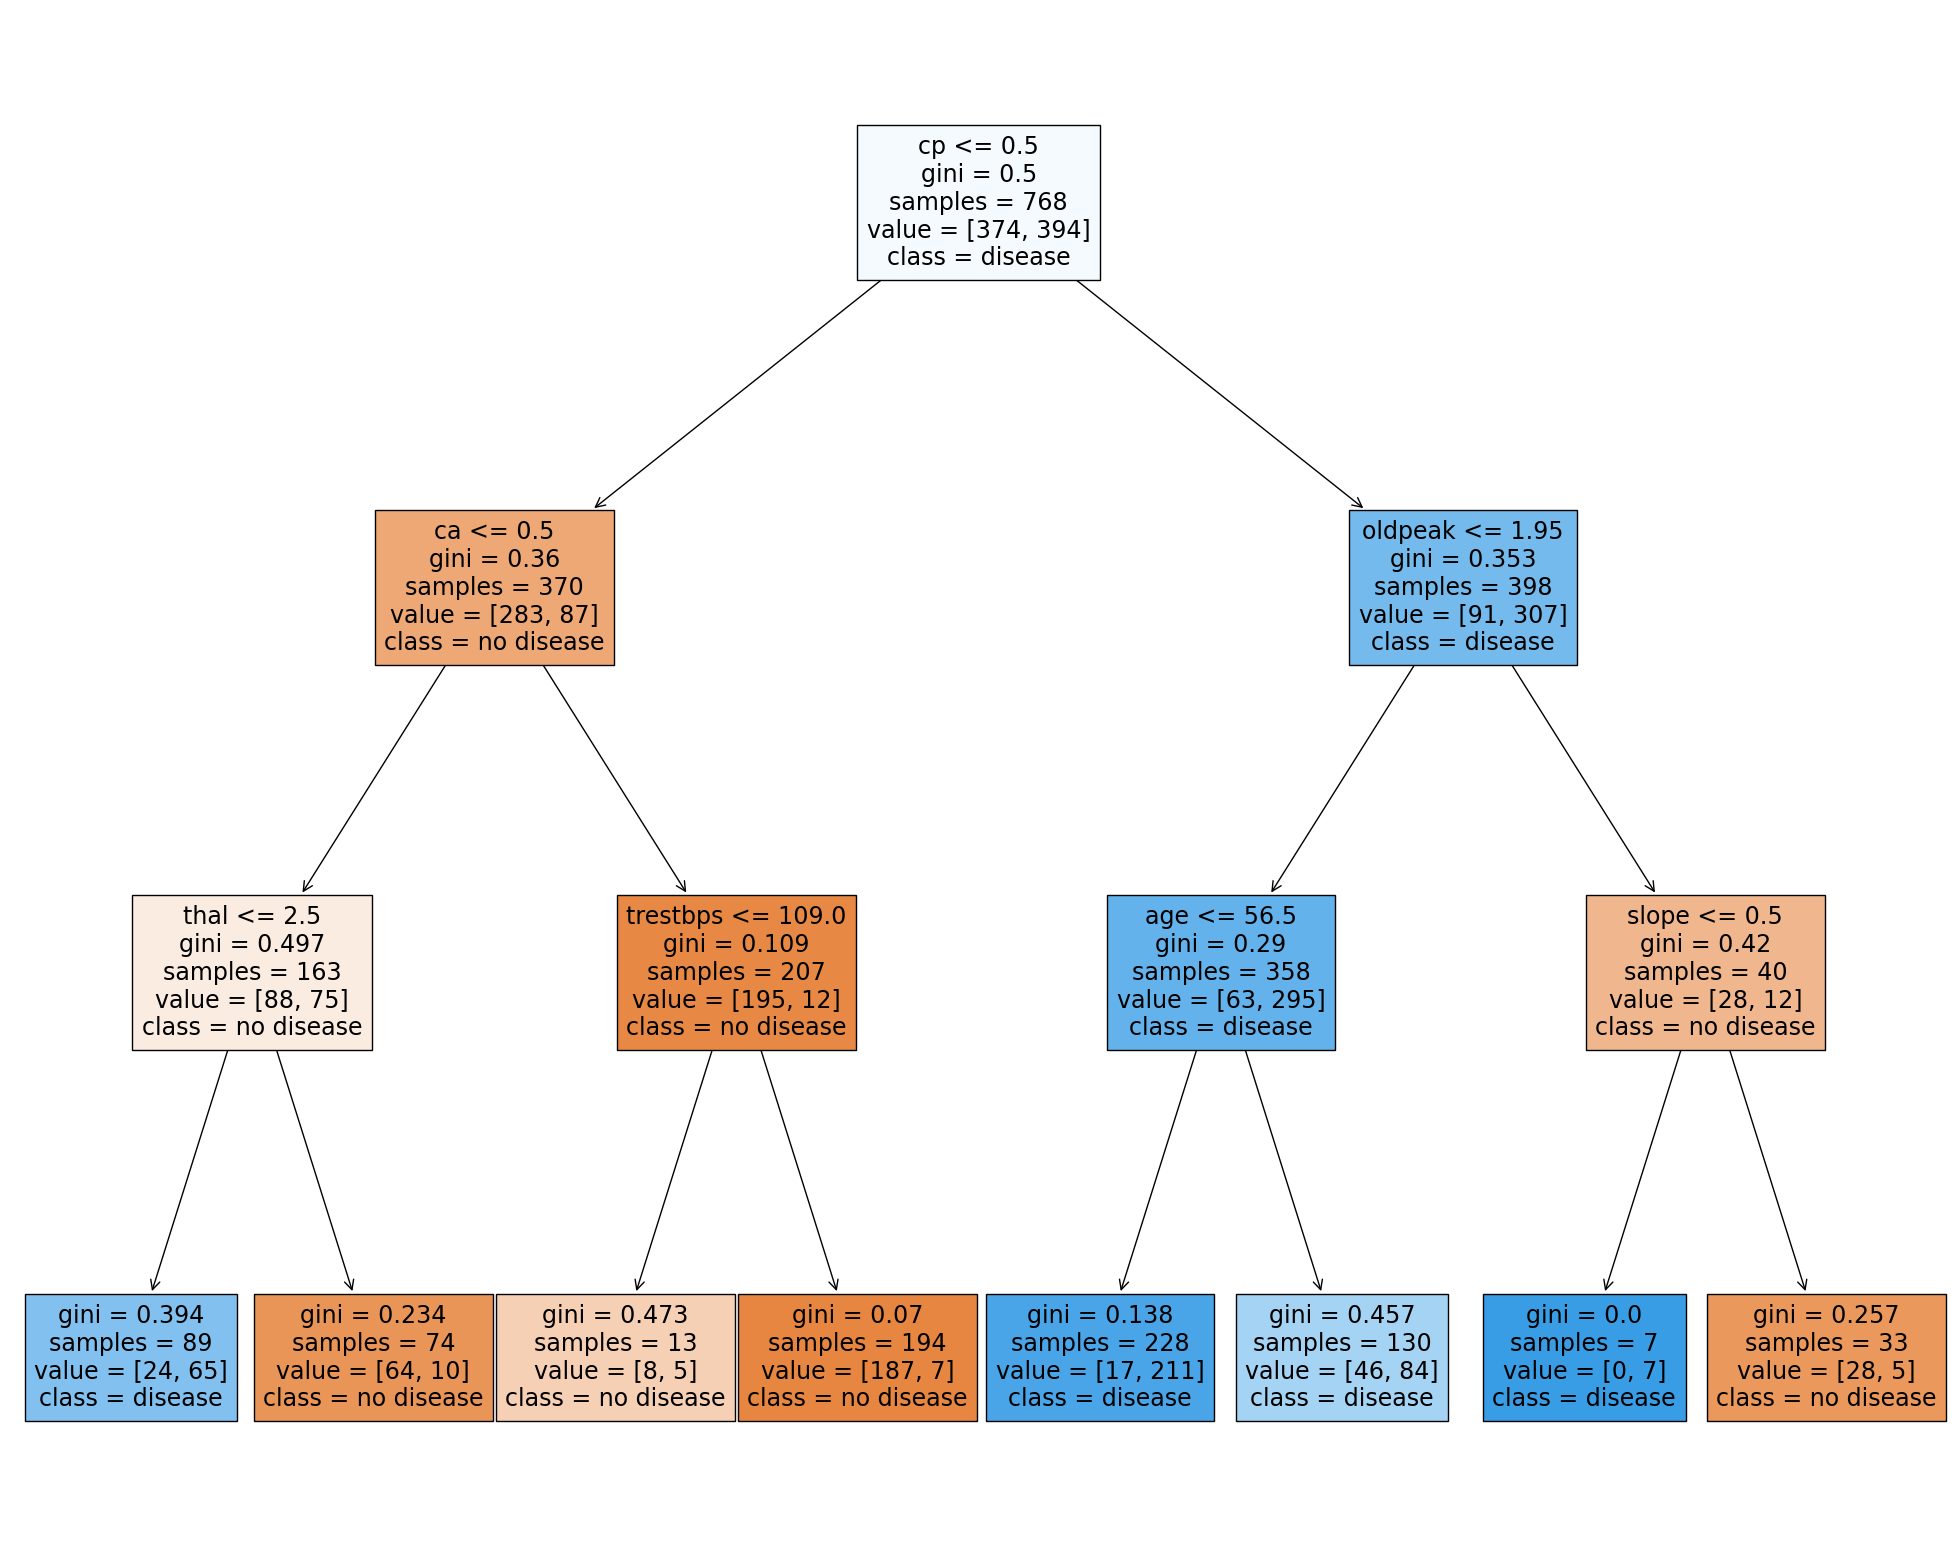

In [42]:
fig = plt.figure(figsize=(25,20))

_ = tree.plot_tree(clf, 
                   feature_names=X.columns,  
                   class_names=['no disease', 'disease'],
                   filled=True)

## 5. Hyperparameters Tuning

Hyperparameter Tuning is one of the critical steps in model building. It helps in increasing model's accuracy even further.

### 5.1. Playing around with one hyperparameter

During model initialization, we should accurately select parameters. Previously on the initialization above we did choose few parameters, namely, `max_depth = 3`.


Let's see what happens if we set this parameter to `max_depth = 7`

In [46]:
# Initialize the model
clf = DecisionTreeClassifier(max_depth = 7, 
                             random_state = 3
                            )

In [47]:
# Train the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=3)

Checking accuracy of this model

In [48]:
print(f'Accuracy of Decision Tree classifier on training set: {clf.score(X_train, y_train):.2f}')
print(f'Accuracy of Decision Tree classifier on test set: {clf.score(X_train, y_train):.2f}')

Accuracy of Decision Tree classifier on training set: 0.98
Accuracy of Decision Tree classifier on test set: 0.98


We see an increase of the model's accuracy. We can also write a simple `for` loop to observe different accuracy scores for different values of `max_depth`, and pick the value of `max_depth` that gives the highest accuracy. This is called hyperparameter tuning.

In [51]:
for this_max_depth in [1, 3, 5, 7, 10]:
    
    #initialize a model
    clf = DecisionTreeClassifier(max_depth = this_max_depth, random_state = 3)
    
    #fit the model
    clf.fit(X_train, y_train)
    
    #print results
    print(f'Decision Tree with max_depth = {this_max_depth}')
    print(f'Accuracy of Decision Tree classifier on training set: {clf.score(X_train, y_train):.2f}')
    print(f'Accuracy of Decision Tree classifier on test set: {clf.score(X_test, y_test):.2f}\n')

Decision Tree with max_depth = 1
Accuracy of Decision Tree classifier on training set: 0.77
Accuracy of Decision Tree classifier on test set: 0.74

Decision Tree with max_depth = 3
Accuracy of Decision Tree classifier on training set: 0.85
Accuracy of Decision Tree classifier on test set: 0.83

Decision Tree with max_depth = 5
Accuracy of Decision Tree classifier on training set: 0.92
Accuracy of Decision Tree classifier on test set: 0.89

Decision Tree with max_depth = 7
Accuracy of Decision Tree classifier on training set: 0.98
Accuracy of Decision Tree classifier on test set: 0.95

Decision Tree with max_depth = 10
Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.99



### 5.2. All Hyperparameters of Decision Tree

There are many hyperparameters in Decision Tree. All are presented below  - as you can see, they have values by default. Feel free to play around with them. To understand each hyperparameter, visit https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.

In [ ]:
clf = DecisionTreeClassifier(criterion='gini', 
                             splitter='best', 
                             max_depth=None,  #what we played around with above
                             min_samples_split=2, 
                             min_samples_leaf=1, 
                             min_weight_fraction_leaf=0.0, 
                             max_features=None, 
                             random_state=None, 
                             max_leaf_nodes=None, 
                             min_impurity_decrease=0.0, 
                             class_weight=None, 
                             ccp_alpha=0.0)